### Content

SO answers, May, 2019 

#1. https://stackoverflow.com/questions/55929257/electric-potential-of-points-using-scipy-and-distance

In [1]:
import numpy as np

In [36]:
def get_electric_potential(x, qi, ri):
    """
    x = (x1, x2, x3)
    
    qi = (q1, ..., qN)
    
    ri = (...).shape = 3 x N
    """
    eps0 = 0.00001 # Put your value here!!!
    C = 1 / 4 / np.pi / eps0
    C = 1  # comment this line
    return C * ((qi / np.diag((x - ri).T @ (x - ri))) * (x - ri)).sum(axis=1)   

In [39]:
x = np.array([1,2,3])[:, np.newaxis]
ri = np.arange(30).reshape(3, 10)
qi = np.arange(10)
get_electric_potential(x, qi, ri)

array([-0.28622007, -0.83010791, -1.37399575])

#2 

In [2]:
%matplotlib qt

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata

ax = plt.subplot()
ax.set_aspect(1)

# Simulate some given data.
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
phi = np.arctan2(y, x) % (2 * np.pi)
data = np.arctan2(np.cos(phi), np.sin(phi)) % np.pi

# Plot data.
u = np.cos(data)
v = np.sin(data)
ax.quiver(x, y, u, v, headlength=0.01, headaxislength=0, pivot='middle', units='xy')

# Create a smaller grid within.
x1, y1 = np.meshgrid(np.linspace(-6, 5, 20), np.linspace(-4, 8, 25))
# ax.plot(x1, y1, '.', color='red', markersize=2)

# Prepare data.


# Interpolate data on grid.
interpolation = griddata((x.flatten(), y.flatten()), data.flatten(), (x1.flatten(), y1.flatten()), method='nearest')
#u1 = griddata((x.flatten(), y.flatten()), (u.flatten()), (x1.flatten(), y1.flatten()), method='nearest')
#v1 = griddata((x.flatten(), y.flatten()), (v.flatten()), (x1.flatten(), y1.flatten()), method='nearest')
# Plot interpolated data.
u1 = np.cos(interpolation)
v1 = np.sin(interpolation)
ax.quiver(x1, y1, u1, v1, headlength=0.01, headaxislength=0, pivot='middle', units='xy',
          scale=3, width=0.03, color='red')

plt.show()

#3. https://stackoverflow.com/questions/55998113/how-to-find-combined-standard-deviation-of-two-columns-in-python-from-data-frame

In [37]:
import pandas as pd
df = pd.DataFrame({'a' :  pd.np.arange(10), 'b': pd.np.arange(10)})
pd.np.r_[df.loc[:,'a'].values, df.loc[:,'b'].values].std()

2.8722813232690143

In [71]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

group1 = np.array([[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]])

group2 = np.array([[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]])


In [81]:
clf = svm.SVC(kernel='linear', C=100)

In [82]:
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

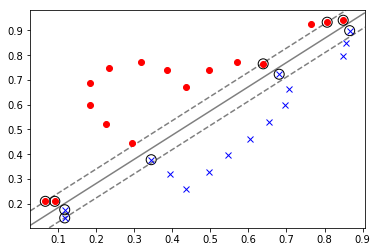

In [83]:
plt.plot(group1[:,0], group1[:,1], 'ro', group2[:,0], group2[:,1], 'bx')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 20)
yy = np.linspace(ylim[0], ylim[1], 20)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()